# Meeting-to-Task Agent Demo
Notebook demo sử dụng Meeting-to-Task Agent

## Yêu cầu trước khi chạy:
1. **Python env**: Đã cài các packages trong `requirements.txt`
2. **API Keys** trong `.env`:
   - `OPENAI_API_KEY` hoặc `GOOGLE_API_KEY` (cho LLM + STT)
   - `EMAIL_SENDER` + `EMAIL_PASSWORD` (optional, cho notification)
   - `API_BASE_URL` (optional, mặc định `http://localhost:3000`)
3. **Backend** (optional): Chạy `npm run dev` trong `project-meetly/server` nếu muốn tạo task thật

## 1. Import Agent và UI

In [7]:
import sys
from pathlib import Path

# Add parent directories to path
notebook_path = Path.cwd()
project_root = notebook_path.parent.parent.parent
sys.path.append(str(project_root))

from src.agents.meeting_to_task import MeetingToTaskAgent
from src.agents.meeting_to_task.meeting_ui import get_review_result, reset_review_result, create_review_interface


## 2. Khởi tạo Agent

In [8]:
# Khởi tạo agent
agent = MeetingToTaskAgent()

## 3. Visualize Workflow Graph

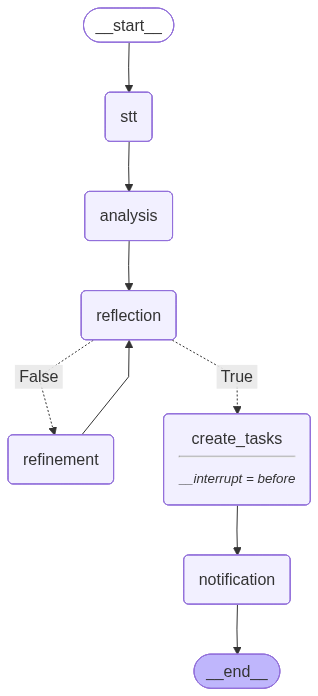

In [9]:
from IPython.display import Image, display

# Hiển thị workflow graph
agent.get_graph()

## 4. BƯỚC 1 - Chạy đến điểm Human Review

Workflow sẽ chạy qua:
- **STT**: Chuyển âm thanh thành văn bản
- **Analysis**: Phân tích và tạo MoM + Action Items
- **Reflection**: Tự kiểm tra chất lượng
- **Refinement** (nếu cần): Tinh chỉnh dựa trên feedback
- **DỪNG** tại điểm Human Review

In [10]:
# Đường dẫn đến file audio (thay đổi theo file thực tế của bạn)
audio_path = 'meeting_audio/meeting001.mp3'  
#src/agents/meeting_to_task/
current_state, thread = agent.run(
    audio_file_path=audio_path,
    meeting_metadata={
        "title": "Sprint 42 - Task Planning",
        "date": "2025-12-03",  # Ngày họp
        "projectId": 1,        # ID project "SuperApp_V2" trong database
        "teamId": 1,           # ID team
        "authorUserId": 10,    # ID user tạo meeting/tasks (Hùng)
        "participants": [
            {"userId": 10, "username": "Hùng", "email": "nguyenquangphuoc964@gmail.com"},
            {"userId": 5, "username": "Lan", "email": "nguyenquangphuoc964@gmail.com"},
            {"userId": 7, "username": "Tuấn", "email": "nguyenquangphuoc964@gmail.com"},
            {"userId": 8, "username": "Nam", "email": "nguyenquangphuoc964@gmail.com"}
        ]
    },
    max_revisions=2,
    thread_id='demo_session_1'
)


🚀 Starting Meeting-to-Task Agent...
👥 Participants: Hùng, Lan, Tuấn, Nam

[NODE 1] Đang chuyển đổi âm thanh thành văn bản...
  ✅ Transcript: 2542 ký tự

[NODE 2] Đang phân tích và tạo MoM...


e:\Individual\Projects\Dacnnt\src\agents\meeting_to_task\agent.py:140: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  action_items_list = [item.dict() for item in response.action_items]


  ✅ Summary: 895 ký tự
  ✅ Action Items: 3 items
     - Unassigned: Tích hợp cổng thanh toán VNPay...
     - Lan: Thiết kế lại giao diện Dashboard báo cáo...
     - Nam: Fix lỗi crash app khi upload ảnh quá 5 M...

[NODE 3] Đang tự kiểm tra chất lượng...
  📝 Critique: **Phân tích Action Items (AI) so với Minutes of Meeting (MoM):**

1.  **AI 1: "Tích hợp cổng thanh t...
  🎯 Decision: revise

[NODE 4] Tinh chỉnh MoM...


e:\Individual\Projects\Dacnnt\src\agents\meeting_to_task\agent.py:201: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  refined_action_items = [item.dict() for item in response.action_items]


  🔄 Revision #1

[NODE 3] Đang tự kiểm tra chất lượng...
  📝 Critique: **Phân tích theo Tiêu chí Đánh giá:**

1.  **Action item thiếu title hoặc title quá chung chung:**
 ...
  🎯 Decision: accept


In [5]:
# Lấy dữ liệu để hiển thị
mom = current_state.values['mom']
action_items = current_state.values['action_items']

# Reset và launch UI
reset_review_result()
demo = create_review_interface(mom, action_items)
demo.launch(
    share=False,
    inbrowser=False,
    inline=True,
    quiet=False
)

e:\Individual\Projects\Dacnnt\.dacntt\Lib\site-packages\gradio\routes.py:1154: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  @app.on_event("startup")
e:\Individual\Projects\Dacnnt\.dacntt\Lib\site-packages\fastapi\applications.py:4495: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  return self.router.on_event(event_type)
e:\Individual\Projects\Dacnnt\.dacntt\Lib\site-packages\uvicorn\protocols\websockets\websockets_impl.py:17: DeprecationWarning: websockets.server.WebSocketServerProtocol is deprecated
  from websockets.server import WebSocketServerProtocol


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


e:\Individual\Projects\Dacnnt\.dacntt\Lib\site-packages\starlette\templating.py:178: DeprecationWarning: The `name` is not the first parameter anymore. The first parameter should be the `Request` instance.
Replace `TemplateResponse(name, {"request": request})` by `TemplateResponse(request, name)`.
  warnings.warn(


IMPORTANT: You are using gradio version 4.31.3, however version 4.44.1 is available, please upgrade.
--------


In [6]:
# Lấy kết quả từ UI
result = get_review_result()

# Tiếp tục workflow
final_result = agent.continue_after_review(
    thread=thread,
    updated_mom=result['mom'],
    updated_action_items=result['action_items']
)


▶️ Continuing after human review...

[NODE 5] Tạo tasks...
  ⚠️  API not running - Mock mode
  ✅ Task would be created:
     📝 Title: Tích hợp cổng thanh toán VNPay
     📊 Project ID: 1
     👤 Assigned to: User #10
     🏷️  Status: To Do
     🎯 Priority: High
     📅 Due Date: 2025-12-10
     📄 Description: Cần điền nốt thông tin và đẩy ticket "Tích hợp cổng thanh to...
  ⚠️  API not running - Mock mode
  ✅ Task would be created:
     📝 Title: Thiết kế lại giao diện Dashboard báo cáo
     📊 Project ID: 1
     👤 Assigned to: User #5
     🏷️  Status: To Do
     🎯 Priority: Medium
     📅 Due Date: 2025-12-12
     📄 Description: Thiết kế lại giao diện Dashboard báo cáo theo file Figma mới...
  ⚠️  API not running - Mock mode
  ✅ Task would be created:
     📝 Title: Fix lỗi crash app khi upload ảnh quá 5 MB
     📊 Project ID: 1
     👤 Assigned to: User #8
     🏷️  Status: In Progress
     🎯 Priority: High
     📅 Due Date: 2025-12-03
     📄 Description: Fix lỗi crash app khi upload ảnh có du